<a href="https://colab.research.google.com/github/A0143704/TC4033-Vision-C-Equipo-3/blob/main/2_2_Simple_ImgProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

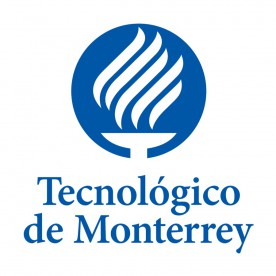



#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Visión computacional para imágenes y video (Gpo 10)**
###Tecnológico de Monterrey
### **Prof Dr. Gilberto Ochoa Ruiz**
### **Equipo # 3**
### Práctica: *Actividad 2.2 Simple_ImgProcessing*

<center>

|   |   |
|---|---|
| Matrícula | Alumno|
| A01793474   | Juan Pablo Bladinieres Martin del Campo|
| A01793546  | José Ariel Corral|
| A01794050  | José Bernardo Moreno Villarreal|
| A01021190   | Ian André Ortega Suárez|
| A00143704   | Moisés Rangel Silva  |

</center>



# 2.2 Simple_ImgProcessing

## Table of Contents
1. [Libraries](#libraries)
2. [Transformaciones Pixel a Pixel](#hist)
3. [Negativo](#denoising)
4. [Correción gama](#challenge)
5. [Sustracción](#challenge)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [69]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage import exposure
import skimage
from scipy.ndimage.filters import gaussian_filter as gauss
from scipy.ndimage.filters import median_filter as med
import cv2

## EJERCICIOS

# 1.- Las transformaciones **pixel a pixel** son sumamente utilizadas para aumentar la cantidad de imágenes para entrenar modelos de inteligencia artificial, sobre todo aquellas de tipo fotométrico. Investiga 3 tipos de transformaciones y aplicarlas en el proyecto de Google Collab sobre imágenes propias.

<class 'numpy.ndarray'>


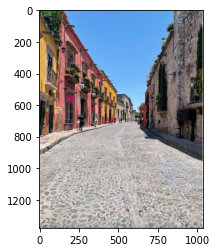

In [70]:
image = mpimg.imread('/content/San Miguel.jpeg')
plt.imshow(image)
print(type(image))

1- Transformación **Traslación**: cambiará de ubicación, realizando desplazamiento en el eje x, y o ambos.

<class 'numpy.ndarray'>


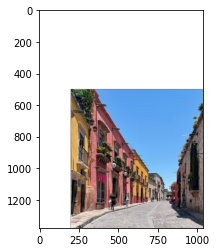

In [71]:
ancho = image.shape[1] #columnas
alto = image.shape[0] # filas

# Trasformation
M = np.float32([[1,0,200],[0,1,500]])
imageOut = cv2.warpAffine(image,M,(ancho,alto))

plt.imshow(imageOut)
print(type(imageOut))

2- Transformación Rotación: rotar la imagen cierto angulo.

<class 'numpy.ndarray'>


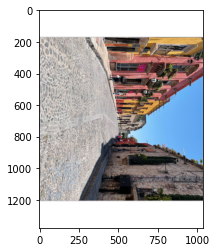

In [72]:
M = cv2.getRotationMatrix2D((ancho//2,alto//2),270,1)
imageOut = cv2.warpAffine(image,M,(ancho,alto))
plt.imshow(imageOut)
print(type(imageOut))

3- Transformación Escalar: modificar el tamaño de la imagen.

<class 'numpy.ndarray'>


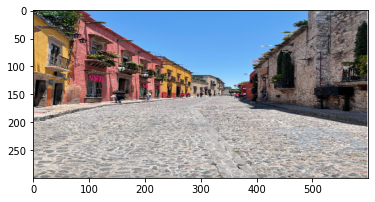

In [73]:
imageOut = cv2.resize(image,(600,300), interpolation=cv2.INTER_CUBIC)
plt.imshow(imageOut)
print(type(imageOut))

# 2.- Investiga una aplicación donde obtener el **negativo** de imagen tenga un valor específico e integra el código en en una fila de google collab, justificar brevemente tu investigación y haciendo una demo sencilla.

Es necesario entender que para generar un negativo es solo transformar los valores de la matriz a valores contrarios usando 1-(matriz de imagen) debe generar la matriz negativa. Se añade una grafica inicial y final de la transformación para que se denote como se hace el cambio de valores de cada uno de los campos RGB.
Greyrat, R. (2022, julio 5). Transformación negativa de una imagen usando Python y OpenCV. Recuperado el 20 de enero de 2023, de Barcelona Geeks website: https://barcelonageeks.com/transformacion-negativa-de-una-imagen-usando-python-y-opencv/

Uso de los histogramas

In [93]:
from skimage.exposure import histogram as imhist
from pylab import * 

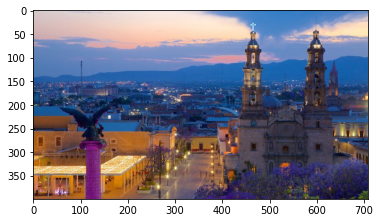

In [94]:
image2 = mpimg.imread('/content/Aguas.jpeg')
plt.imshow(image)
plt.show() 

In [95]:
R = image2[...,0] # Red
G = image2[...,1] # Green
B = image2[...,2] # Blue

# Hallar histograma para cada uno
hist_R, bin_centers_R = imhist(R)
hist_G, bin_centers_G = imhist(G)
hist_B, bin_centers_B = imhist(B)

Text(0, 0.5, '# pixeles')

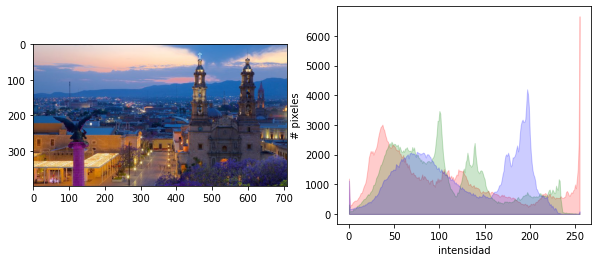

In [97]:
# Obtener lienzos para la imagen y para el histograma
_, (ax_image, ax_hist) = subplots(1, 2, figsize=(10, 4))

# Mostrar imagen en el primer lienzo
ax_image.imshow(image2, cmap="gray")

# Mostar histograma en el segundo lienzo
# alpha para habiltar transparencia
# color para especificar el color
ax_hist.fill_between(bin_centers_R, hist_R, alpha=0.2, color="red")
ax_hist.fill_between(bin_centers_G, hist_G, alpha=0.2, color="green")
ax_hist.fill_between(bin_centers_B, hist_B, alpha=0.2, color="blue")

ax_hist.set_xlabel('intensidad')
ax_hist.set_ylabel('# pixeles')

Ejemplo de Negativo

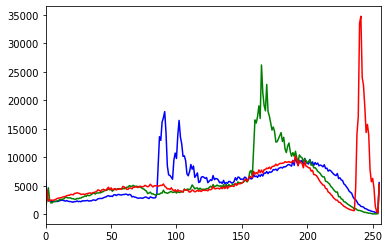

In [74]:
color = ('b', 'g', 'r')
  
for i, col in enumerate(color):
    histr = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])

plt.show()

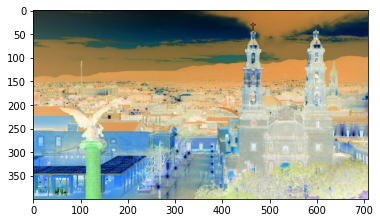

In [99]:
imageOut = 255 - image2 # Una sola linea de código

# Display the negative transformed image
plt.imshow(imageOut)
plt.show()

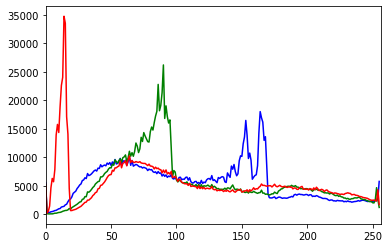

In [76]:
# Histogram plotting of the
# negative transformed image
color = ('b', 'g', 'r')
  
for i, col in enumerate(color):
      
    histr = cv2.calcHist([imageOut], 
                         [i], None,
                         [256],
                         [0, 256])
      
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
      
plt.show()

Ejemplo de la aplicación del Negativo


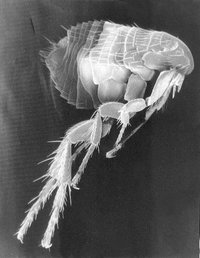

Se usa la imagen anterior como referencia para demostrar la aplicación del negativo de una imagen.

Autor: Centers for Disease Control and Prevention (CDC) / Janice Carr

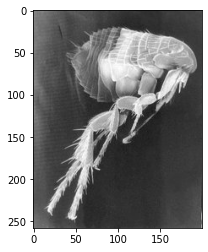

In [77]:
image1 = mpimg.imread('/content/Scanning_Electron_Micrograph_of_a_Flea.jpg')
im_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)


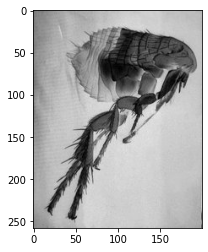

In [78]:
imageOut = 255 - im_rgb # Una sola linea de código
  
# Display the negative transformed image
plt.imshow(imageOut)
plt.show()

Aplicación: 
Obtener una imagen contrastante al emplear un microscopio electrónico de barrido (SEM). El microscópio utiliza un haz móvil de electrones que recorre el objeto.

# 3.- Investiga una aplicación donde se puede usar la corrección de **gamma** en una imagen. Integra el código en en una fila de google collab, justifica brevemente tu investigación y haz una demo sencilla.

AJUSTE GAMMA 1


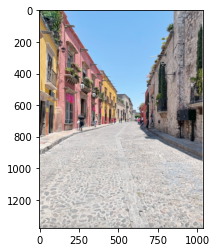

AJUSTE GAMMA 2


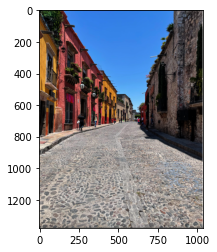

In [79]:
imageOut = np.power(image/float(np.max(image)), 1/1.5) # Una sola fila
print('AJUSTE GAMMA 1')
plt.imshow(imageOut)
plt.show() 

imageOut = np.power(image/float(np.max(image)), 1.5) # Una sola fila
print('AJUSTE GAMMA 2')
plt.imshow(imageOut)
plt.show() 

Ejemplo de aplicación de corrección gamma

Aplicación: En fotografía para realzar objetos

In [80]:
img4 = mpimg.imread('/content/lagarto.JPG')
gamma1 = np.power(img4/float(np.max(img4)), 1/1.5)
gamma2 = np.power(img4/float(np.max(img4)), 1.5)

Text(0.5, 1.0, 'Gamma = 1.5')

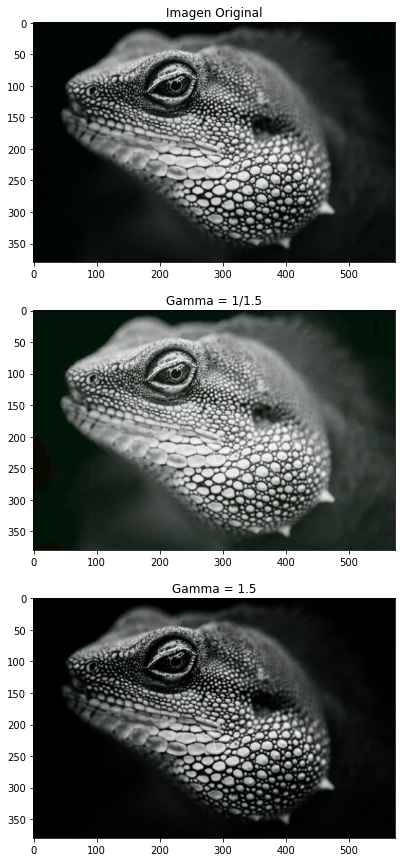

In [81]:
filas=3
columnas=1
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(filas, columnas, 1)
plt.imshow(img4)
plt.title("Imagen Original")
fig.add_subplot(filas, columnas, 2)
plt.imshow(gamma1)
plt.title("Gamma = 1/1.5")
fig.add_subplot(filas, columnas, 3)
plt.imshow(gamma2)
plt.title("Gamma = 1.5")

Correción de gammase refiere a ajustar el contraste de la imagen y reducir la iluminación desigual y las sombras parciales de la imagen.
Fórmula de corrección gamma: f(x)=xγ f ( x ) = x γ Es decir, la salida es la función de potencia de la entrada y el exponente es γ γ ．

Hernández, L. (2020, noviembre 23). OpenCV + Python: Corrección Gamma. Recuperado de https://youtu.be/skZ69gnOEG0

## 4.- Investiga una aplicación donde se puede usar la **sustracción** de imágenes e integra el código en en una fila de google collab, justificar brevemente tu investigación, haciendo una demo sencilla.

La sustracción sirve para comparar dos imagenes y lo que hace es usar la matriz de cada imagen y restar la segunda a la primera, algo importante es que ambas imagenes deben ser del mismo tamaño. Si el resultado de la resta de un pixel es negativo (EJ 1-2 = -1) esta libería transforma a 0. Esto hace que la imagen resultante sea los valores donde la resta sea positivo.
OMES. (2019, marzo 22). ADICIÓN y SUSTRACCIÓN de imágenes con OpenCV y Python. Recuperado de https://youtu.be/qZeOwG-DzwA

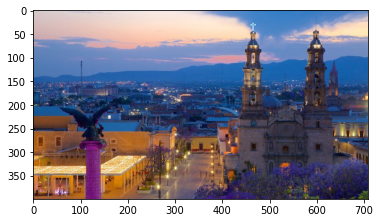

In [82]:
image = mpimg.imread('/content/Aguas.jpeg')
plt.imshow(image)
plt.show() 

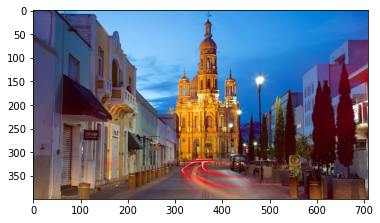

In [83]:
image2 = mpimg.imread('/content/Antonio.jpeg')
plt.imshow(image2)
plt.show() 

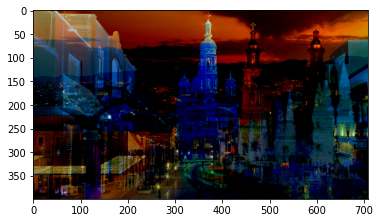

In [84]:
imageOut = cv2.subtract(image,image2) # una sola linea

plt.imshow(imageOut)
plt.show() 

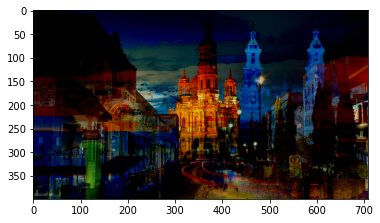

In [85]:
imageOut = cv2.subtract(image2,image) # una sola linea

plt.imshow(imageOut)
plt.show() 

Aplicación: para comparar dos imágenes para determinar si realmente son iguales.

Bibliografía

*  *Image file reading and writing. OpenCV. (n.d.). Retrieved January 25, 2023, from https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html*

* *Python opencv: Saving an image to the file system. techtutorialsx. (2019, March 14). Retrieved January 25, 2023, from https://techtutorialsx.com/2018/06/24/python-opencv-saving-an-image-to-the-file-system/*

* *Vishal. (2022, January 19). Python count number of files in a directory. PYnative. Retrieved January 25, 2023, from https://pynative.com/python-count-number-of-files-in-a-directory/#h-how-to-count-files-in-a-directory*

* *Histograms - 2: Histogram equalization. OpenCV. (n.d.). Retrieved January 25, 2023, from https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html*

* Hernández, L. (2020, noviembre 23). OpenCV + Python: Corrección Gamma. Recuperado de https://youtu.be/skZ69gnOEG0

* OMES. (2019, marzo 22). ADICIÓN y SUSTRACCIÓN de imágenes con OpenCV y Python. Recuperado de https://youtu.be/qZeOwG-DzwA

* Andrew S. Gibson, How to See in Black and White, Pinterest. Retrieved January 25, 2023, https://www.pinterest.com.mx/pin/968625832333796159/